# 1. Importing data and libaries

In [117]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [118]:
# Identifying a path to where data is stored
path = 'C:/Users/andyc/Machine Learning - ClimateWins'

In [119]:
# Importing the Climatewins_scaled data set
cw_scaled = pd.read_csv(os.path.join(path, 'Data Sets', 'ClimateWins_scaled.csv'), index_col = False)

In [120]:
cw_scaled.head()

Unnamed: 0        id      DATE     MONTH  BASEL_cloud_cover  \
0           0 -1.731975  19600101 -1.599964           0.660514   
1           1 -1.731824  19600102 -1.599964           0.244897   
2           2 -1.731673  19600103 -1.599964           1.076130   
3           3 -1.731523  19600104 -1.599964          -1.001953   
4           4 -1.731372  19600105 -1.599964           0.244897   

   BASEL_wind_speed  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0          -0.02793        0.826097       -0.001949               -1.101066   
1          -0.02793        0.735760       -0.001949               -1.058108   
2          -0.02793        1.277781       -0.001949               -1.251420   
3          -0.02793        1.458455       -0.001949               -0.821838   
4          -0.02793        1.729466       -0.001949               -0.746661   

   BASEL_precipitation  ...  VALENTIA_cloud_cover  VALENTIA_humidity  \
0            -0.265148  ...             -0.443701           0.761754   
1             1.658760  ...              0.783085           1.183580   
2             0.155707  ...              0.783085           1.183580   
3            -0.445514  ...              0.783085           0.480538   
4            -0.164944  ...             -1.670486          -0.363113   

   VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0          -1.299744                  -0.806427               -0.088407   
1          -1.262455                  -1.042055                0.503361   
2          -0.432779                  -1.136306               -0.396127   
3           0.387574                  -1.183432                0.669056   
4           1.729970                  -0.794645               -0.490810   

   VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0            -0.024706           0.372147           -0.668215   
1            -0.024706          -0.829285           -0.548046   
2            -0.024706          -1.009500           -0.067372   
3            -0.024706          -1.039536           -0.998679   
4            -0.024706           0.672505           -1.509396   

   VALENTIA_temp_min  VALENTIA_temp_max  
0          -0.519743          -0.752237  
1          -0.629054          -0.407141  
2           0.054135          -0.177078  
3          -0.164486          -0.838511  
4          -1.339569          -1.471186  

[5 rows x 172 columns]

In [121]:
# adjust dataframe to only contain the mean temperatures
adj_cw = cw_scaled[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [122]:
# printing the adjusted dataframe
adj_cw.head()

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0  19600101 -1.599964        -0.528623           -1.016876   
1  19600102 -1.599964        -0.582946           -1.107669   
2  19600103 -1.599964        -0.257010           -1.084971   
3  19600104 -1.599964        -0.555784           -1.209812   
4  19600105 -1.599964        -1.003946           -1.209812   

   BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0           -1.099163         -0.114356             -0.105836   
1           -1.110927         -0.367511             -0.370915   
2           -1.063873         -0.509912             -0.532908   
3           -1.146217         -0.525734             -0.577088   
4           -1.087400         -0.320045             -0.444548   

   GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0         -0.927601           -0.106469         -0.182904   
1         -0.825294           -0.892676         -0.212437   
2         -0.940389           -0.490837         -0.389635   
3         -1.042696           -0.316124         -0.493001   
4         -0.978754           -0.403481         -0.552067   

   LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0            -1.370824             -0.097084         -0.988280   
1            -1.043881             -0.232112         -0.691740   
2            -0.741156             -0.487164         -0.853490   
3            -0.910682             -0.472161         -0.624345   
4            -0.862246             -0.307127         -0.381721   

   MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
0           -0.265742       -0.186575       -1.280450            -0.124331   
1           -0.353714       -0.368598       -0.539569            -0.650834   
2           -0.403983       -0.550620       -0.876333            -0.650834   
3           -0.642763       -0.417137       -0.775304            -0.943336   
4           -0.906678       -0.332193       -0.926848            -0.621584   

   STOCKHOLM_temp_mean  TOURS_temp_mean  VALENTIA_temp_mean  
0            -0.391072        -0.257321           -0.668215  
1            -0.415953        -0.335759           -0.548046  
2            -0.615003        -0.210258           -0.067372  
3            -0.764290        -0.069069           -0.998679  
4            -0.503037        -0.037694           -1.509396

In [123]:
# Dropping the DATE and MONTH data
# numbers are not scaled with the rest of the data
notemp = adj_cw.drop(['DATE','MONTH'], axis=1)

In [124]:
# creating a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

In [125]:
# Reducing the dataset to a single year
cw_year = adj_cw[adj_cw['DATE'].astype(str).str.contains('1998')] 
cw_year

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
13880  19980101 -1.599964        -0.813817           -0.392673   
13881  19980102 -1.599964        -0.134784           -0.279182   
13882  19980103 -1.599964        -0.216268           -0.392673   
13883  19980104 -1.599964        -0.229849           -0.608307   
13884  19980105 -1.599964        -0.311333           -0.665053   
...         ...       ...              ...                 ...   
14240  19981227  1.594371        -0.297752           -2.060998   
14241  19981228  1.594371        -0.623688           -1.788618   
14242  19981229  1.594371        -0.745913           -1.720523   
14243  19981230  1.594371        -1.071849           -1.924808   
14244  19981231  1.594371        -1.329882           -1.584333   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
13880           -1.122690         -0.747245             -0.635995   
13881           -0.605100         -0.367511             -0.459275   
13882           -0.593337         -0.367511             -0.400369   
13883           -0.452176         -0.525734             -0.474002   
13884           -0.863895         -0.604845             -0.694901   
...                   ...               ...                   ...   
14240           -2.299030         -0.114356             -0.017476   
14241           -1.946128         -0.414978             -0.488728   
14242           -1.534409         -0.905467             -0.812714   
14243           -1.487355         -0.557378             -0.591815   
14244           -1.852021         -0.541556             -0.753808   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
13880         -0.595104           -0.875205         -0.374868   
13881         -0.582315           -0.473366         -0.345335   
13882         -0.607892           -0.386009         -0.389635   
13883         -0.480009           -0.875205         -0.404402   
13884         -0.518374           -1.084860         -0.640666   
...                 ...                 ...               ...   
14240         -0.364913           -0.386009         -0.005705   
14241         -0.249818           -0.700492         -0.168137   
14242         -0.582315           -0.822791         -0.876931   
14243         -0.991543           -0.316124         -1.127962   
14244         -1.170580           -0.281182         -1.349460   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
13880            -0.341559             -0.577182         -1.257862   
13881            -0.462649             -0.412148         -0.974801   
13882            -0.426322             -0.352136         -0.503033   
13883            -0.523194             -0.517170         -0.624345   
13884            -0.632175             -0.652197         -0.907406   
...                    ...                   ...               ...   
14240            -1.927838             -0.082081         -1.284820   
14241            -1.261843             -0.382142         -1.567881   
14242            -1.080208             -0.907249         -1.230904   
14243            -1.201298             -0.472161         -1.082634   
14244            -1.225516             -0.397145         -1.487007   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
13880           -1.032352       -0.611295       -1.061553   
13881           -0.240607       -0.477811       -1.229935   
13882            0.048442       -0.526351       -0.657436   
13883           -0.353714       -0.489946       -0.674275   
13884           -0.605061       -0.574890       -0.472216   
...                   ...             ...             ...   
14240            0.236953       -0.623429       -1.953979   
14241           -0.491955       -0.671969       -1.701405   
14242           -0.856409       -1.036014       -1.533023   
14243           -1.409373       -0.914666       -1.229935   
14244           -1.409373       -0.708373       -1.196259   

       SONNBLICK_temp_mean  STOCKH

In [126]:
# descriptive statistics
cw_year.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.650000e+02  365.000000       365.000000          365.000000   
mean   1.998067e+07    0.004762         0.055457            0.003459   
std    3.454755e+02    1.002610         0.978946            1.035151   
min    1.998010e+07   -1.599964        -2.171882           -2.458218   
25%    1.998040e+07   -0.728781        -0.664430           -0.823941   
50%    1.998070e+07    0.142401         0.041765            0.095340   
75%    1.998100e+07    1.013583         0.815862            0.776289   
max    1.998123e+07    1.594371         2.377637            2.217631   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          365.000000        365.000000            365.000000   
mean             0.011689          0.063287             -0.001257   
std              1.015371          0.916216              0.923692   
min             -2.346084         -2.424402             -2.197017   
25%             -0.781551         -0.557378             -0.606541   
50%              0.088941          0.091333              0.011977   
75%              0.712401          0.850800              0.704129   
max              2.206353          2.227334              2.353511   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000        365.000000   
mean          -0.008101            0.079062          0.023464   
std            0.961015            0.898350          1.002148   
min           -2.615664           -1.940952         -2.634148   
25%           -0.697411           -0.630607         -0.670199   
50%           -0.045204            0.033301          0.023828   
75%            0.837192            0.871922          0.821221   
max            2.039297            2.129854          2.371706   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean              0.040986              0.035312          0.026861   
std               1.040098              0.933819          0.985825   
min              -2.460634             -2.347542         -1.648756   
25%              -0.825919             -0.577182         -0.786094   
50%               0.106474              0.007937         -0.125619   
75%               0.833014              0.803099          0.804439   
max               2.019697              2.348413          2.004078   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000      365.000000   
mean             0.050990       -0.004386        0.031270   
std              0.967621        0.850058        1.163212   
min             -2.364494       -2.067477       -2.206552   
25%             -0.642763       -0.647699       -0.943686   
50%              0.098712       -0.077361       -0.017584   
75%              0.802485        0.832753        0.959032   
max              2.285435        1.463765        2.322927   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean              0.020598            -0.051904         0.015042   
std               1.011836             0.859687         0.991912   
min              -2.712972            -2.244718        -2.312401   
25%              -0.723959            -0.751849        -0.633824   
50%               0.065796            -0.154701        -0.037694   
75%               0.680050             0.741020         0.825126   
max               2.186434             1.512336         2.378201   

       VALENTIA_temp_mean  
count          365.000000  
mean             0.195106  
std              0.986141  
min             -2.771167  
25%             -0.487962  
50%              0.203008  
75%              1.014146  
max              2.606381

In [127]:
# Dropping the DATE and MONTH data as those numbers are not scaled with the rest of the data
no_temp_year = cw_year.drop(['DATE','MONTH'], axis=1)

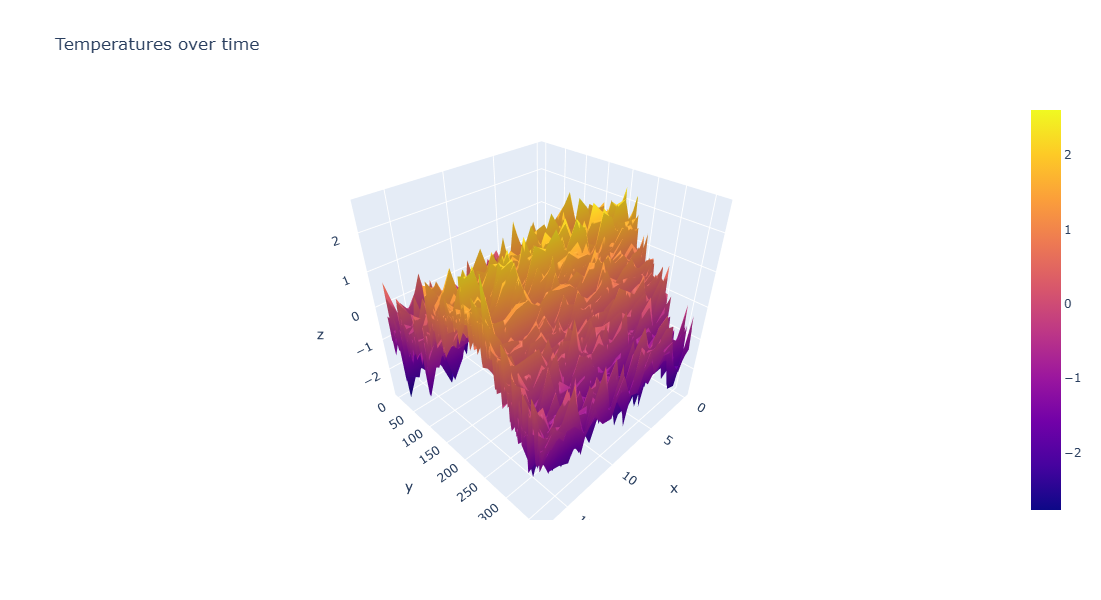

In [128]:
# Plotting ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

fig = go.Figure(data=[go.Surface(z=no_temp_year.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [129]:
# Creating a set of data from 1 to 365

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [257]:
# Checking the number of rows
n_rows = cw_year.shape[0]
n_rows

365

In [131]:
# Translating the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=cw_year['TOURS_temp_mean'].to_numpy().reshape(n_rows,1)

In [132]:
# checking the rows and columns of X and y
X.shape, y.shape

((365, 2), (365, 1))

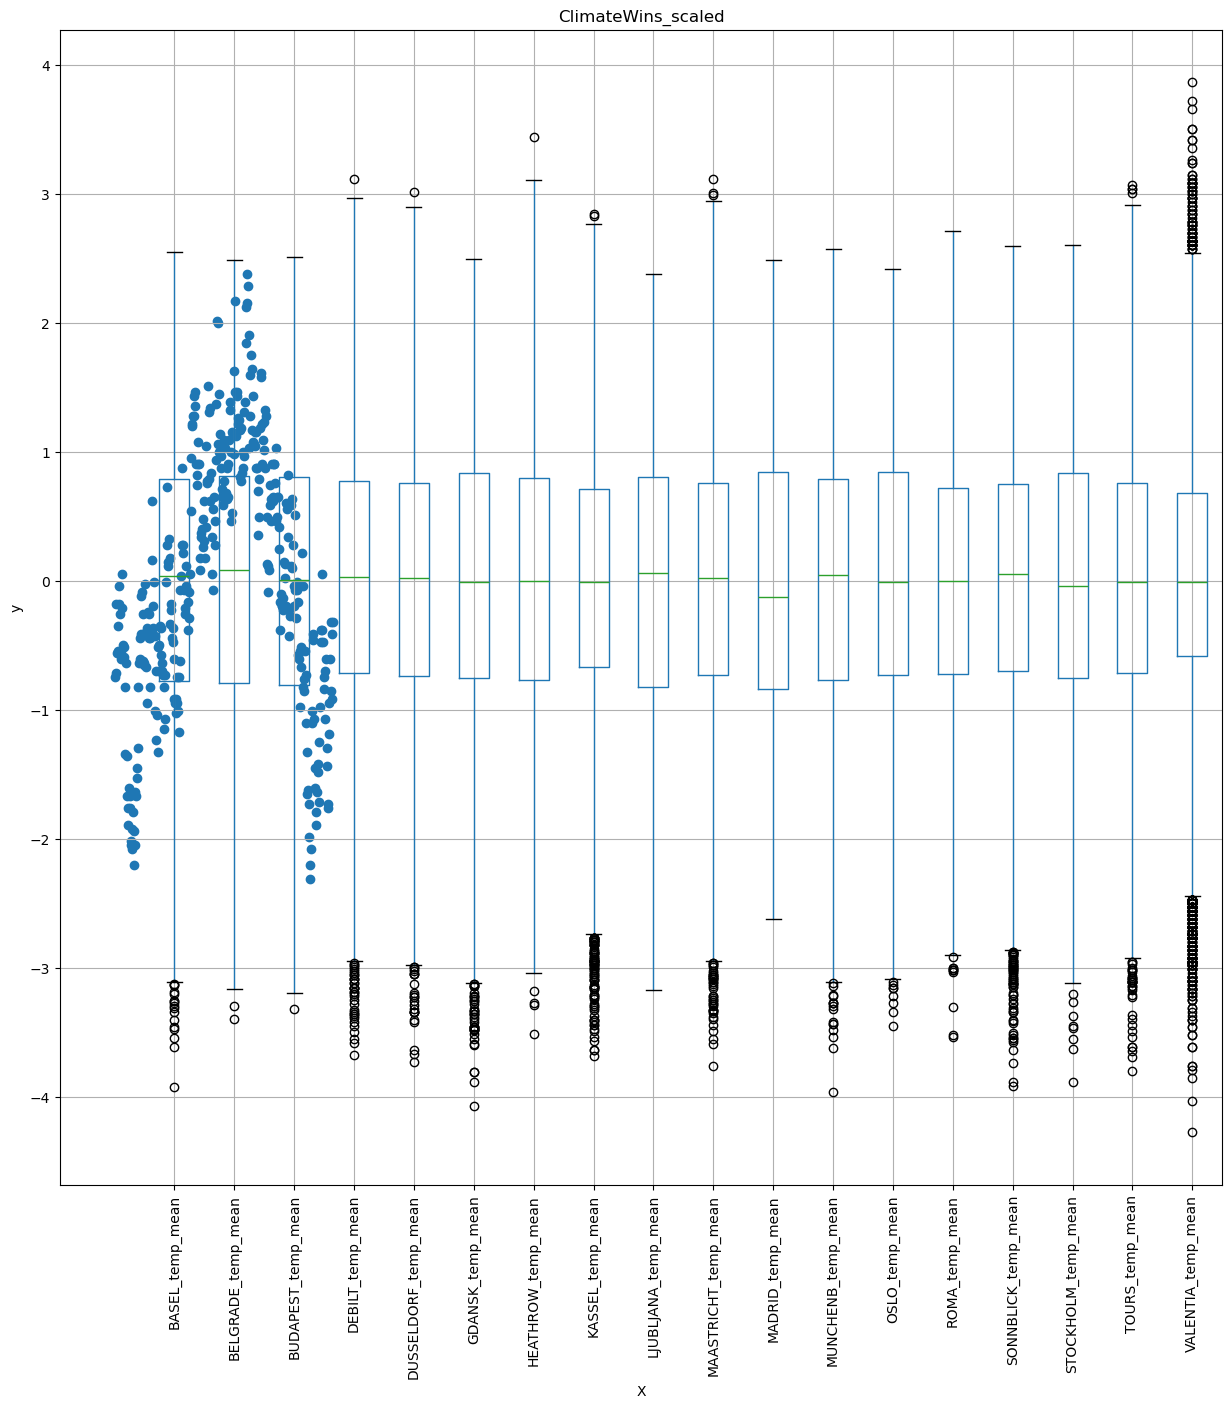

In [133]:
# Looking at one year of temperature data over time
plt.scatter(x=index['index'], y=cw_year['TOURS_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('ClimateWins_scaled');

plt.show();

In [134]:
# printing the minimum temperature
cw_year['TOURS_temp_mean'].min()

-2.312400588353966

In [135]:
# printing the maximum temperature
cw_year['TOURS_temp_mean'].max()

2.378201144160955

In [136]:
# Computing the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [137]:
compute_cost(X,y)

array([0.49071003])

In [138]:
# This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [215]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations=500
theta_init=np.array([[-1],[1]])
alpha=0.005

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 156 ms
Wall time: 170 ms


In [216]:
theta

array([[-0.77880217],
       [ 0.36460873]])

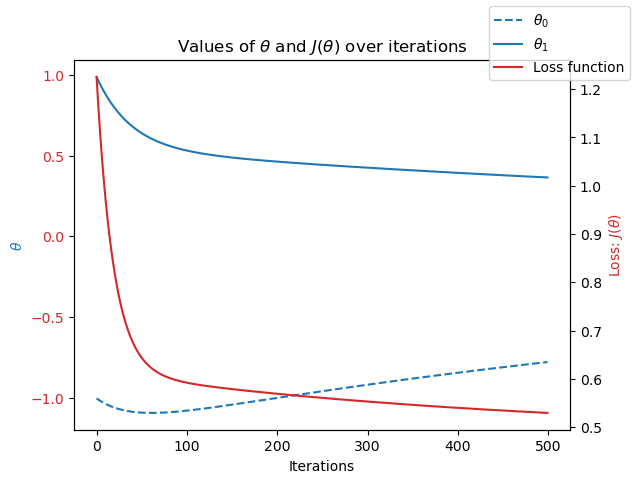

In [219]:
# Plotting the loss, theta0, and theta1.
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show();

In [389]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.17 s
Wall time: 1.17 s


In [390]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [700]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [242]:
# Rerunning the optimization above but this time starting closer to the objective

num_iterations=500
theta_init=np.array([[-0.11],[0.39]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.01
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [702]:
# Looking at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [245]:
# This plot shows the convergence similar to above, but only in the X/Y plane

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');

# Investigate at least three different weather stations and three different years and find values where the gradient descent converges.

### BUDAPEST 1960

In [249]:
# Reducing the dataset to a single year
cw_year1 = adj_cw[adj_cw['DATE'].astype(str).str.contains('1960')] 
cw_year1

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0    19600101 -1.599964        -0.528623           -1.016876   
1    19600102 -1.599964        -0.582946           -1.107669   
2    19600103 -1.599964        -0.257010           -1.084971   
3    19600104 -1.599964        -0.555784           -1.209812   
4    19600105 -1.599964        -1.003946           -1.209812   
..        ...       ...              ...                 ...   
361  19601227  1.594371        -1.289140           -1.277907   
362  19601228  1.594371        -1.289140           -1.255208   
363  19601229  1.594371        -1.207656           -1.221161   
364  19601230  1.594371        -1.547172           -1.243859   
365  19601231  1.594371        -1.139752           -1.107669   

     BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0             -1.099163         -0.114356             -0.105836   
1             -1.110927         -0.367511             -0.370915   
2             -1.063873         -0.509912             -0.532908   
3             -1.146217         -0.525734             -0.577088   
4             -1.087400         -0.320045             -0.444548   
..                  ...               ...                   ...   
361           -1.440302         -1.126979             -0.974707   
362           -1.416775         -1.522534             -1.283966   
363           -1.122690         -1.570001             -1.313420   
364           -1.169744         -1.316845             -1.372326   
365           -1.216797         -1.032045             -1.048340   

     GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0           -0.927601           -0.106469         -0.182904   
1           -0.825294           -0.892676         -0.212437   
2           -0.940389           -0.490837         -0.389635   
3           -1.042696           -0.316124         -0.493001   
4           -0.978754           -0.403481         -0.552067   
..                ...                 ...               ...   
361         -0.940389           -1.469228         -0.891697   
362         -0.978754           -1.469228         -1.054129   
363         -1.234521           -1.434286         -1.305160   
364         -0.889236           -1.084860         -1.393759   
365         -1.145003           -1.137274         -1.172261   

     LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0              -1.370824             -0.097084         -0.988280   
1              -1.043881             -0.232112         -0.691740   
2              -0.741156             -0.487164         -0.853490   
3              -0.910682             -0.472161         -0.624345   
4              -0.862246             -0.307127         -0.381721   
..                   ...                   ...               ...   
361            -1.721985             -0.997267         -1.069155   
362            -1.479805             -1.342338         -1.338737   
363            -1.443478             -1.342338         -0.920885   
364            -1.273952             -1.177304         -0.772615   
365            -1.286061             -0.937255         -1.136550   

     MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
0             -0.265742       -0.186575       -1.280450            -0.124331   
1             -0.353714       -0.368598       -0.539569            -0.650834   
2             -0.403983       -0.550620       -0.876333            -0.650834   
3             -0.642763       -0.417137       -0.775304            -0.943336   
4             -0.906678       -0.332193       -0.926848            -0.621584   
..                  ...             ...             ...                  ...   
361           -1.120324       -0.417137       -1.785596            -0.914086   
362           -1.321402       -0.550620       -1.381479            -1.279713   
363           -1.459643       -0.708373       -1.819273            -1.659965   
364           -1.547614       -0.829722       -1.549861      

In [251]:
# Dropping the DATE and MONTH data as those numbers are not scaled with the rest of the data
no_temp_year1 = cw_year1.drop(['DATE','MONTH'], axis=1)

In [704]:
# Plotting ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

fig = go.Figure(data=[go.Surface(z=no_temp_year1.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [269]:
# Creating a set of data from 1 to 365

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [271]:
# Checking the number of rows
n_rows1 = cw_year1.shape[0]
n_rows1

366

In [341]:
# Translating the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows1,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows1,1))
X = np.concatenate((ones, X), axis=1)
y=cw_year1['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows1,1)

In [343]:
# checking the rows and columns of X and y
X.shape, y.shape

((366, 2), (366, 1))

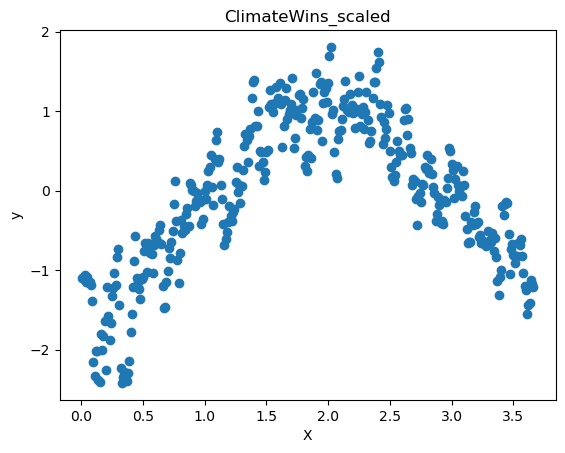

In [345]:
# Looking at one year of temperature data over time
plt.scatter(x=index['index'], y=cw_year1['BUDAPEST_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('ClimateWins_scaled');

plt.show();

In [347]:
# printing the minimum temperature
cw_year1['BUDAPEST_temp_mean'].min()

-2.4166643260714715

In [349]:
# printing the maximum temperature
cw_year1['BUDAPEST_temp_mean'].max()

1.8063974207400055

In [351]:
# Computing the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [353]:
compute_cost(X,y)

array([0.44887979])

In [355]:
# This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [367]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations=100
theta_init=np.array([[-5],[-1]])
alpha=0.01

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 31.2 ms
Wall time: 34.6 ms


In [369]:
theta

array([[-3.22548024],
       [ 1.4017197 ]])

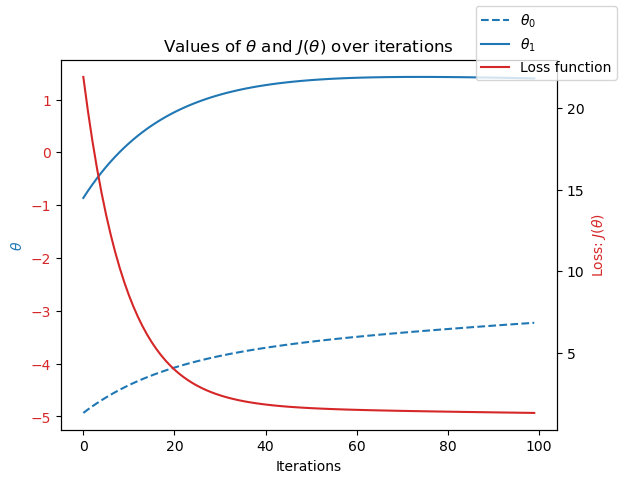

In [371]:
# Plotting the loss, theta0, and theta1.
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show();

In [385]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.12 s
Wall time: 1.15 s


In [386]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### BUDAPEST 1990

In [395]:
# Reducing the dataset to a single year
cw_year2 = adj_cw[adj_cw['DATE'].astype(str).str.contains('1990')] 
cw_year2

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
10958  19900101 -1.599964        -1.696559           -1.584333   
10959  19900102 -1.599964        -1.655817           -1.538937   
10960  19900103 -1.599964        -1.710140           -1.527588   
10961  19900104 -1.599964        -1.506430           -1.788618   
10962  19900105 -1.599964        -1.411366           -2.083696   
...         ...       ...              ...                 ...   
11318  19901227  1.594371        -0.515042           -1.005527   
11319  19901228  1.594371        -0.895301           -1.107669   
11320  19901229  1.594371        -0.012558           -1.289256   
11321  19901230  1.594371         0.218313           -0.937432   
11322  19901231  1.594371        -0.297752           -0.733147   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
10958           -1.369721         -1.506712             -1.490139   
10959           -1.428538         -1.427601             -1.269240   
10960           -1.440302         -1.301023             -1.460686   
10961           -1.616753         -1.538357             -1.401779   
10962           -1.687333         -1.063690             -1.107247   
...                   ...               ...                   ...   
11318           -1.299141         -0.589023             -0.842167   
11319           -1.169744         -0.810534             -0.753808   
11320           -1.463829         -0.240934             -0.400369   
11321           -1.263851         -0.604845             -0.503455   
11322           -1.063873         -0.873823             -0.768534   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
10958         -1.298463           -1.172216         -1.541424   
10959         -1.081061           -1.049918         -1.452825   
10960         -1.196156           -1.259573         -1.570958   
10961         -1.515865           -1.032446         -1.570958   
10962         -1.592595           -0.805320         -1.408526   
...                 ...                 ...               ...   
11318         -0.786929           -0.945090         -0.832631   
11319         -0.825294           -0.648078         -1.024596   
11320         -0.850871           -0.648078         -0.463468   
11321         -0.659045           -0.857734         -0.611133   
11322         -0.684622           -0.770377         -0.921230   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
10958            -1.479805             -1.447359         -0.974801   
10959            -1.528241             -1.342338         -1.136550   
10960            -1.382933             -1.387347         -1.069155   
10961            -1.516132             -1.642398         -1.136550   
10962            -1.794639             -1.237316         -1.082634   
...                    ...                   ...               ...   
11318            -1.177080             -0.772222         -0.840010   
11319            -1.092317             -0.862240         -0.907406   
11320            -1.080208             -0.247115         -0.853490   
11321            -0.801701             -0.532173         -0.893927   
11322            -0.947009             -0.802228         -0.961322   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
10958           -1.811529       -1.594218       -1.937140   
10959           -1.522480       -1.497139       -1.566700   
10960           -1.359104       -1.703431       -1.600376   
10961           -1.710990       -1.023880       -1.583538   
10962           -1.447075       -0.878261       -1.886626   
...                   ...             ...             ...   
11318           -0.491955       -0.659834       -1.246774   
11319           -1.057487       -0.805452       -1.263612   
11320           -0.077232       -0.684104       -1.566700   
11321           -0.240607       -1.145228       -0.960524   
11322           -0.466820       -1.569948       -0.741627   

       SONNBLICK_temp_mean  STOCKH

In [397]:
# Dropping the DATE and MONTH data as those numbers are not scaled with the rest of the data
no_temp_year2 = cw_year2.drop(['DATE','MONTH'], axis=1)

In [399]:
# Plotting ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

fig = go.Figure(data=[go.Surface(z=no_temp_year2.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [401]:
# Creating a set of data from 1 to 365

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [403]:
# Checking the number of rows
n_rows2 = cw_year2.shape[0]
n_rows2

365

In [405]:
# Translating the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows2,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows2,1))
X = np.concatenate((ones, X), axis=1)
y=cw_year2['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows2,1)

In [407]:
# checking the rows and columns of X and y
X.shape, y.shape

((365, 2), (365, 1))

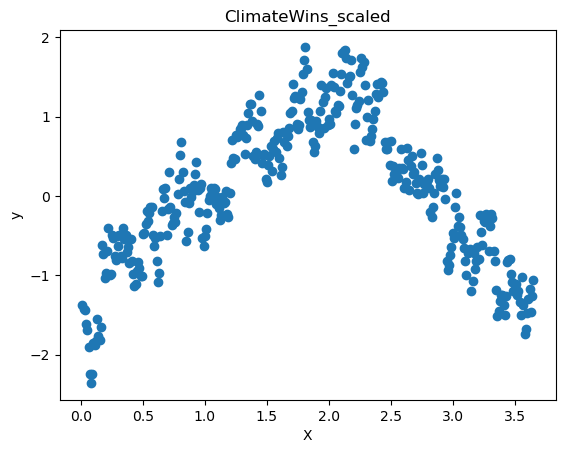

In [409]:
# Looking at one year of temperature data over time
plt.scatter(x=index['index'], y=cw_year2['BUDAPEST_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('ClimateWins_scaled');

plt.show();

In [411]:
# printing the minimum temperature
cw_year2['BUDAPEST_temp_mean'].min()

-2.357847310099167

In [413]:
# printing the maximum temperature
cw_year2['BUDAPEST_temp_mean'].max()

1.8769778399067711

In [415]:
# Computing the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [417]:
compute_cost(X,y)

array([0.41038062])

In [419]:
# This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [421]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations=100
theta_init=np.array([[-5],[-1]])
alpha=0.01

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 31.2 ms
Wall time: 35.5 ms


In [423]:
theta

array([[-3.13166875],
       [ 1.35934202]])

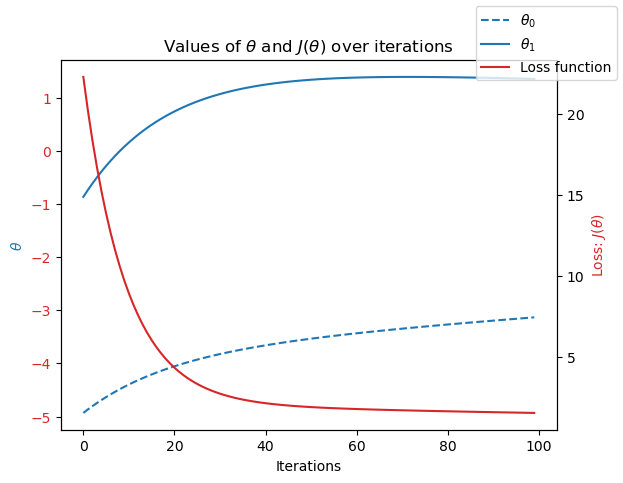

In [425]:
# Plotting the loss, theta0, and theta1.
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show();

In [427]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.09 s
Wall time: 1.15 s


In [429]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss


fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### BUDAPEST 2020

In [442]:
# Reducing the dataset to a single year
cw_year3 = adj_cw[adj_cw['DATE'].astype(str).str.startswith('2020')] 
cw_year3

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
21915  20200101 -1.599964        -1.465688           -1.209812   
21916  20200102 -1.599964        -1.397785           -1.141717   
21917  20200103 -1.599964        -0.691591           -1.357351   
21918  20200104 -1.599964        -0.596526           -1.504889   
21919  20200105 -1.599964        -1.180494           -1.050924   
...         ...       ...              ...                 ...   
22276  20201227  1.594371        -1.180494           -1.130368   
22277  20201228  1.594371        -0.786655           -0.528863   
22278  20201229  1.594371        -0.813817           -0.131643   
22279  20201230  1.594371        -1.058269           -0.052199   
22280  20201231  1.594371        -1.153333           -0.460768   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
21915           -0.934476         -1.459245             -1.387053   
21916           -1.169744         -0.968756             -1.225060   
21917           -1.569699         -0.383334             -0.444548   
21918           -1.063873         -0.525734             -0.827441   
21919           -1.040346         -0.494089             -0.635995   
...                   ...               ...                   ...   
22276           -1.369721         -0.794712             -0.871621   
22277           -0.863895         -1.016223             -0.945254   
22278           -0.346305         -1.000401             -1.357599   
22279           -0.499230         -0.921290             -1.048340   
22280           -0.734498         -1.253556             -1.151427   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
21915         -0.735776           -1.102331         -0.005705   
21916         -0.953178           -0.595665         -0.005705   
21917         -0.799717           -0.386009         -0.005705   
21918         -0.556739           -0.980032         -0.005705   
21919         -0.722987           -0.648078         -0.005705   
...                 ...                 ...               ...   
22276         -1.017119           -0.875205         -0.005705   
22277         -0.710199           -1.783711         -0.005705   
22278         -0.480009           -1.539113         -0.005705   
22279         -0.838082           -1.521642         -0.005705   
22280         -1.119426           -2.115665         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
21915            -1.370824             -1.612392         -1.123071   
21916            -1.625113             -0.997267         -1.203946   
21917            -1.419260             -0.397145         -1.500486   
21918            -1.104426             -0.772222         -1.069155   
21919            -1.225516             -0.637194         -1.176988   
...                    ...                   ...               ...   
22276            -1.382933             -0.877243         -1.635277   
22277            -1.261843             -1.087286         -1.244383   
22278            -0.947009             -1.207310         -1.406132   
22279            -0.934900             -1.012270         -1.365695   
22280            -1.019663             -1.147298         -1.635277   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
21915           -1.032352       -0.550620       -0.000746   
21916           -1.321402       -0.283654       -0.000746   
21917           -0.693033       -0.235114       -0.000746   
21918           -0.592494       -0.696239       -0.000746   
21919           -0.818707       -0.793317       -0.000746   
...                   ...             ...             ...   
22276           -1.396806       -0.429272       -0.000746   
22277           -1.095189       -0.623429       -0.000746   
22278           -0.781005       -0.502081       -0.000746   
22279           -0.856409       -0.574890       -0.000746   
22280           -0.969515       -0.756913       -0.000746   

       SONNBLICK_temp_mean  STOCKH

In [444]:
# Dropping the DATE and MONTH data as those numbers are not scaled with the rest of the data
no_temp_year3 = cw_year3.drop(['DATE','MONTH'], axis=1)

In [446]:
# Plotting ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

fig = go.Figure(data=[go.Surface(z=no_temp_year3.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [448]:
# Creating a set of data from 1 to 366

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [450]:
# Checking the number of rows
n_rows3 = cw_year3.shape[0]
n_rows3

366

In [452]:
# Translating the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows3,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows3,1))
X = np.concatenate((ones, X), axis=1)
y=cw_year3['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows3,1)

In [454]:
# checking the rows and columns of X and y
X.shape, y.shape

((366, 2), (366, 1))

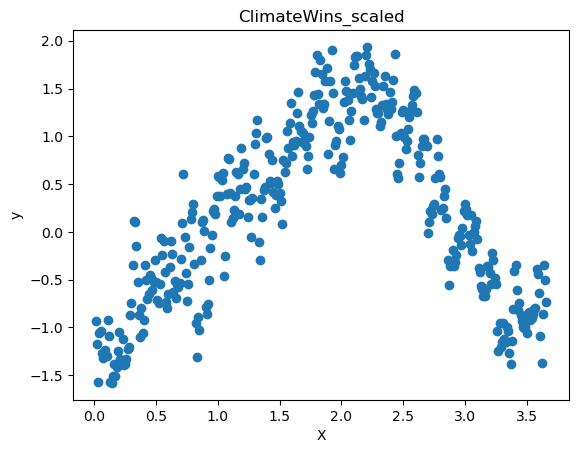

In [456]:
# Looking at one year of temperature data over time
plt.scatter(x=index['index'], y=cw_year3['BUDAPEST_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('ClimateWins_scaled');

plt.show();

In [458]:
# printing the minimum temperature
cw_year3['BUDAPEST_temp_mean'].min()

-1.5814626992647445

In [460]:
# printing the maximum temperature
cw_year3['BUDAPEST_temp_mean'].max()

1.935794855879076

In [462]:
# Computing the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [464]:
compute_cost(X,y)

array([0.44029615])

In [466]:
# This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [468]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations=100
theta_init=np.array([[-5],[-1]])
alpha=0.1

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 31.2 ms
Wall time: 37.2 ms


In [470]:
theta

array([[-0.53189063],
       [ 0.33319104]])

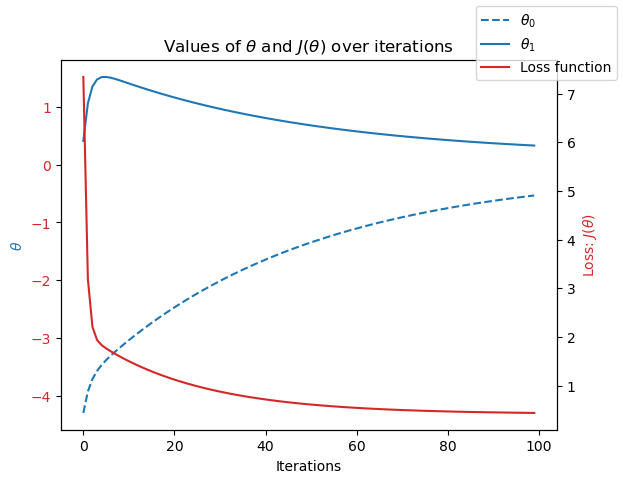

In [472]:
# Plotting the loss, theta0, and theta1.
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show();

In [474]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.2 s
Wall time: 1.22 s


In [476]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### MADRID 1960

In [479]:
# Translating the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows1,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows1,1))
X = np.concatenate((ones, X), axis=1)
y=cw_year1['MADRID_temp_mean'].to_numpy().reshape(n_rows1,1)

In [481]:
# checking the rows and columns of X and y
X.shape, y.shape

((366, 2), (366, 1))

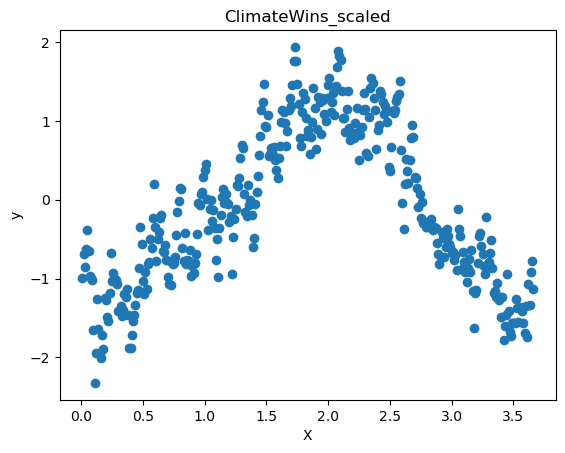

In [483]:
# Looking at one year of temperature data over time
plt.scatter(x=index['index'], y=cw_year1['MADRID_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('ClimateWins_scaled');

plt.show();

In [485]:
# printing the minimum temperature
cw_year1['MADRID_temp_mean'].min()

-2.322710316206882

In [487]:
# printing the maximum temperature
cw_year1['MADRID_temp_mean'].max()

1.9366821017377809

In [489]:
# Computing the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [491]:
compute_cost(X,y)

array([0.48699971])

In [493]:
# This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [495]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations=500
theta_init=np.array([[0],[0]])
alpha=0.02

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 172 ms
Wall time: 170 ms


In [497]:
theta

array([[-0.27037156],
       [ 0.08027708]])

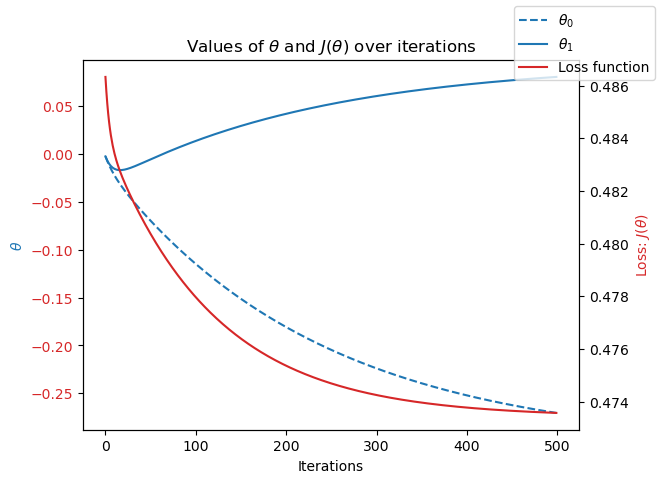

In [499]:
# Plotting the loss, theta0, and theta1.
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show();

In [501]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.16 s
Wall time: 1.16 s


In [503]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### MADRID 1990

In [522]:
# Creating a set of data from 1 to 365

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [524]:
# Checking the number of rows
n_rows2 = cw_year2.shape[0]
n_rows2

365

In [526]:
# Translating the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows2,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows2,1))
X = np.concatenate((ones, X), axis=1)
y=cw_year2['MADRID_temp_mean'].to_numpy().reshape(n_rows2,1)

In [530]:
# checking the rows and columns of X and y
X.shape, y.shape

((365, 2), (365, 1))

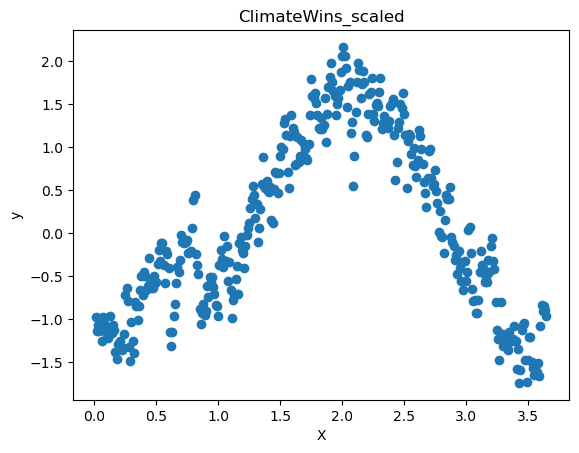

In [532]:
# Looking at one year of temperature data over time
plt.scatter(x=index['index'], y=cw_year2['MADRID_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('ClimateWins_scaled');

plt.show();

In [534]:
# printing the minimum temperature
cw_year2['MADRID_temp_mean'].min()

-1.743109449208083

In [536]:
# printing the maximum temperature
cw_year2['MADRID_temp_mean'].max()

2.1658266305512592

In [538]:
# Computing the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [540]:
compute_cost(X,y)

array([0.52425693])

In [542]:
# This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [544]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations=500
theta_init=np.array([[0],[0]])
alpha=0.02

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 156 ms
Wall time: 172 ms


In [546]:
theta

array([[-0.12038745],
       [ 0.10281342]])

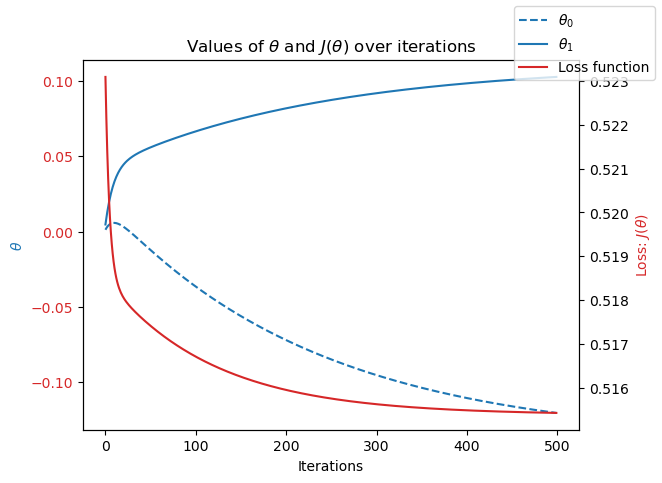

In [548]:
# Plotting the loss, theta0, and theta1.
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show();

In [550]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.12 s
Wall time: 1.15 s


In [552]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### MADRID 2020

In [557]:
# Creating a set of data from 1 to 365

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [559]:
# Translating the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows3,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows3,1))
X = np.concatenate((ones, X), axis=1)
y=cw_year3['MADRID_temp_mean'].to_numpy().reshape(n_rows3,1)

In [561]:
# checking the rows and columns of X and y
X.shape, y.shape

((366, 2), (366, 1))

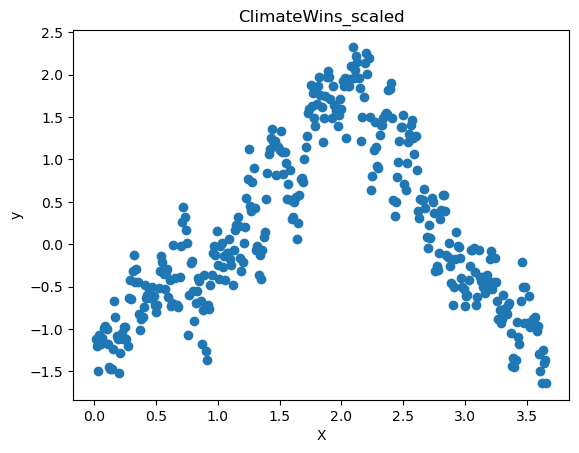

In [563]:
# Looking at one year of temperature data over time
plt.scatter(x=index['index'], y=cw_year3['MADRID_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('ClimateWins_scaled');

plt.show();

In [565]:
# printing the minimum temperature
cw_year3['MADRID_temp_mean'].min()

-1.635276729766446

In [567]:
# printing the maximum temperature
cw_year3['MADRID_temp_mean'].max()

2.3275757097137157

In [569]:
# Computing the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [571]:
compute_cost(X,y)

array([0.5125818])

In [573]:
# This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [575]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations=200
theta_init=np.array([[0],[0]])
alpha=0.05

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 62.5 ms
Wall time: 71 ms


In [577]:
theta

array([[-0.0609547 ],
       [ 0.11381949]])

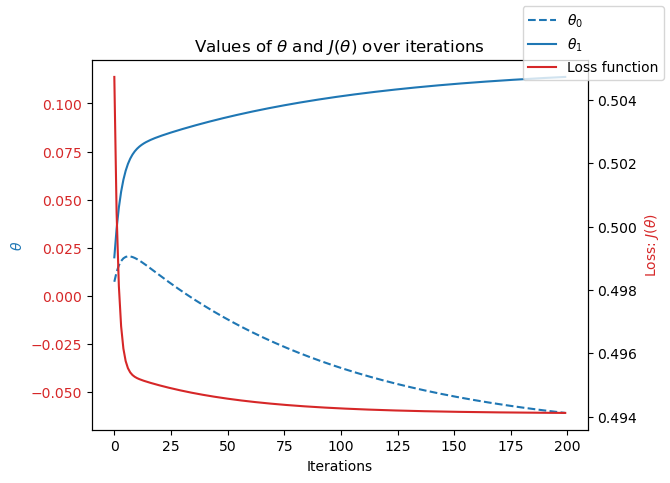

In [579]:
# Plotting the loss, theta0, and theta1.
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show();

In [581]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.16 s
Wall time: 1.16 s


In [583]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### Stockholm 1960

In [586]:
# Translating the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows1,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows1,1))
X = np.concatenate((ones, X), axis=1)
y=cw_year1['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows1,1)

In [588]:
# checking the rows and columns of X and y
X.shape, y.shape

((366, 2), (366, 1))

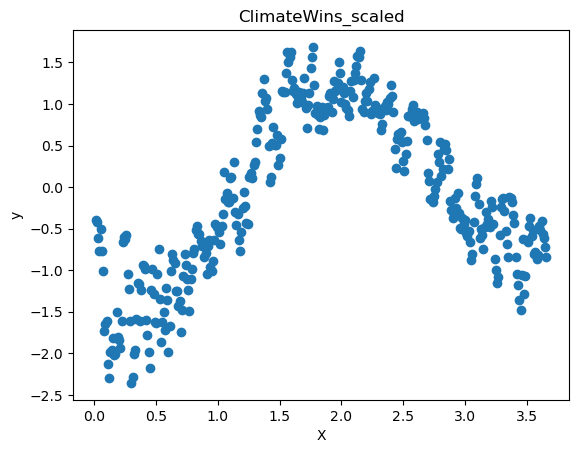

In [590]:
# Looking at one year of temperature data over time
plt.scatter(x=index['index'], y=cw_year1['STOCKHOLM_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('ClimateWins_scaled');

plt.show();

In [594]:
# printing the minimum temperature
cw_year1['STOCKHOLM_temp_mean'].min()

-2.356683584001993

In [596]:
# printing the maximum temperature
cw_year1['STOCKHOLM_temp_mean'].max()

1.6865044645383225

In [598]:
# Computing the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [600]:
compute_cost(X,y)

array([0.49173644])

In [602]:
# This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [604]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations=150
theta_init=np.array([[0],[0]])
alpha=0.1

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 62.5 ms
Wall time: 53.1 ms


In [606]:
theta

array([[-0.65669454],
       [ 0.31053287]])

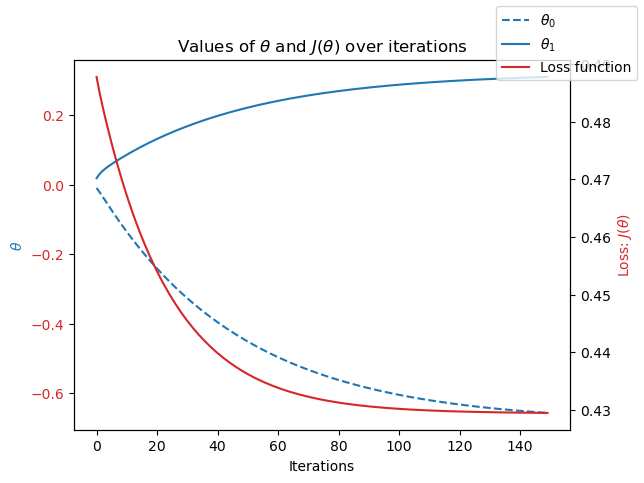

In [608]:
# Plotting the loss, theta0, and theta1.
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show();

In [610]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.19 s
Wall time: 1.2 s


In [612]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### Stockholm 1990

In [615]:
# Creating a set of data from 1 to 365

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [617]:
# Checking the number of rows
n_rows2 = cw_year2.shape[0]
n_rows2

365

In [619]:
# Translating the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows2,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows2,1))
X = np.concatenate((ones, X), axis=1)
y=cw_year2['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows2,1)

In [621]:
# checking the rows and columns of X and y
X.shape, y.shape

((365, 2), (365, 1))

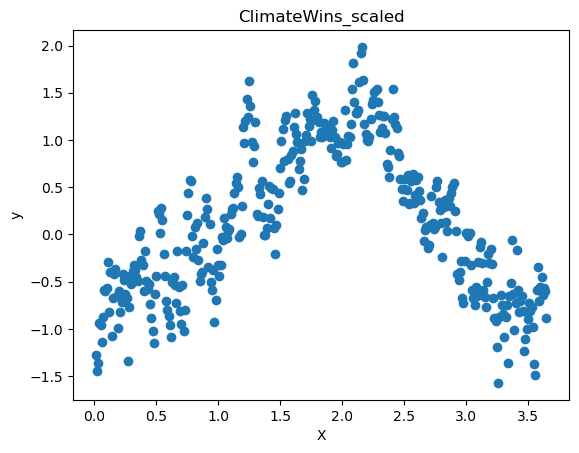

In [623]:
# Looking at one year of temperature data over time
plt.scatter(x=index['index'], y=cw_year2['STOCKHOLM_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('ClimateWins_scaled');

plt.show();

In [625]:
# printing the minimum temperature
cw_year2['STOCKHOLM_temp_mean'].min()

-1.5729271315157165

In [627]:
# printing the maximum temperature
cw_year2['STOCKHOLM_temp_mean'].max()

1.9850783511997607

In [629]:
# Computing the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [631]:
compute_cost(X,y)

array([0.3193237])

In [633]:
# This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [635]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations=100
theta_init=np.array([[0],[0]])
alpha=0.01

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 31.2 ms
Wall time: 33.7 ms


In [637]:
theta

array([[0.02980705],
       [0.05230967]])

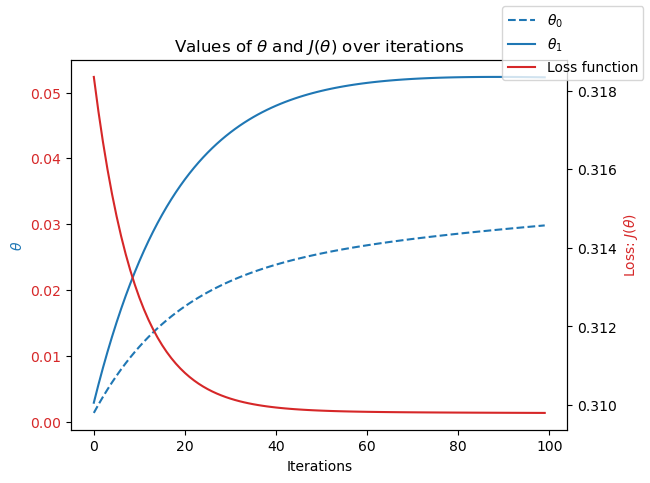

In [639]:
# Plotting the loss, theta0, and theta1.
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show();

In [641]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.19 s
Wall time: 1.23 s


In [643]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### Stockholm 2020

In [672]:
# Creating a set of data from 1 to 365

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [673]:
# Translating the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows3,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows3,1))
X = np.concatenate((ones, X), axis=1)
y=cw_year3['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows3,1)

In [674]:
# checking the rows and columns of X and y
X.shape, y.shape

((366, 2), (366, 1))

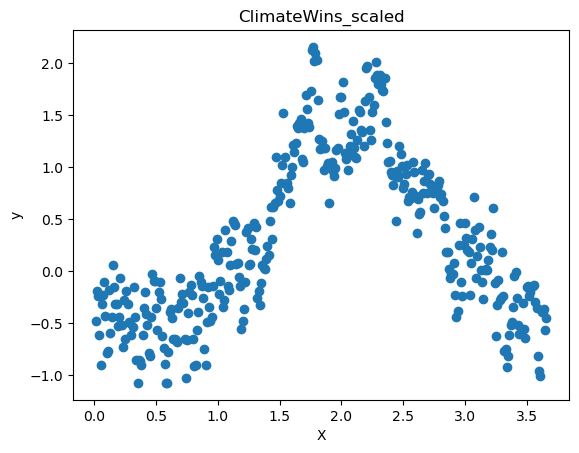

In [675]:
# Looking at one year of temperature data over time
plt.scatter(x=index['index'], y=cw_year3['STOCKHOLM_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('ClimateWins_scaled');

plt.show();

In [680]:
# printing the minimum temperature
cw_year3['STOCKHOLM_temp_mean'].min()

-1.0753039870799852

In [682]:
# printing the maximum temperature
cw_year3['STOCKHOLM_temp_mean'].max()

2.1592464517522667

In [684]:
# Computing the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [686]:
compute_cost(X,y)

array([0.35415859])

In [688]:
# This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [690]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations=150
theta_init=np.array([[0],[0]])
alpha=0.1

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 46.9 ms
Wall time: 50.4 ms


In [692]:
theta

array([[-0.0506269 ],
       [ 0.18933487]])

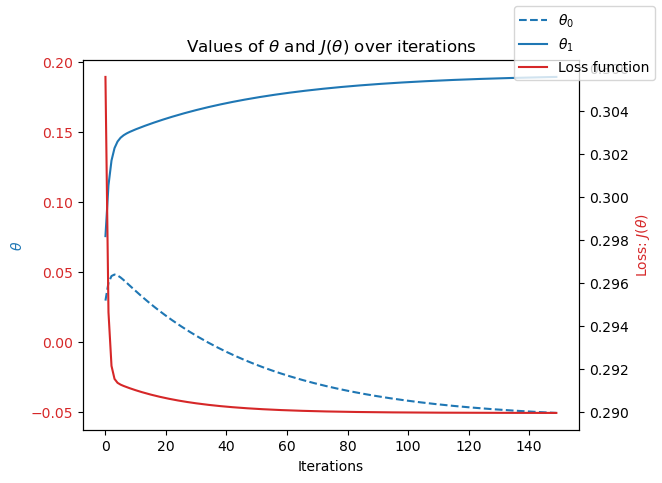

In [694]:
# Plotting the loss, theta0, and theta1.
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show();

In [696]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.12 s
Wall time: 1.15 s


In [698]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()